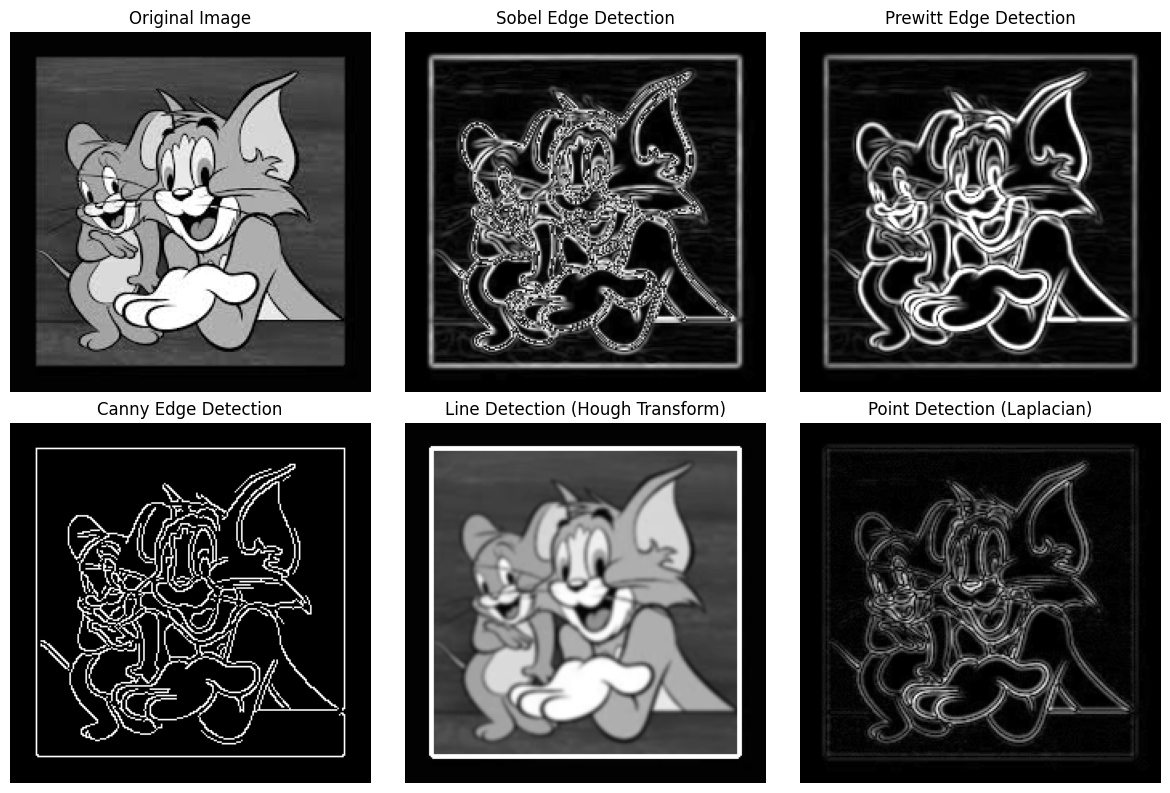

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_sobel(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobel_x, sobel_y)
    return np.uint8(sobel)

def apply_prewitt(image):
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
    
    prewitt_x = cv2.filter2D(image.astype(np.float32), -1, kernelx)
    prewitt_y = cv2.filter2D(image.astype(np.float32), -1, kernely)
    
    magnitude = cv2.magnitude(prewitt_x, prewitt_y)
    return np.uint8(np.clip(magnitude, 0, 255))

def apply_canny(image):
    return cv2.Canny(image, 50, 150)

def detect_lines(image):
    edges = apply_canny(image)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)
    line_img = np.copy(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (255, 255, 255), 2)
    return line_img

def detect_points(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return np.uint8(np.abs(laplacian))

# Load image
gray_image = cv2.imread('download.jpeg', cv2.IMREAD_GRAYSCALE)
if gray_image is None:
    raise ValueError("Error: Image not found or cannot be loaded.")
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply segmentation techniques
sobel_edges = apply_sobel(blurred_image)
prewitt_edges = apply_prewitt(blurred_image)
canny_edges = apply_canny(blurred_image)
lines_detected = detect_lines(blurred_image)
points_detected = detect_points(blurred_image)

# Display results
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(sobel_edges, cmap='gray')
axs[0, 1].set_title("Sobel Edge Detection")
axs[0, 2].imshow(prewitt_edges, cmap='gray')
axs[0, 2].set_title("Prewitt Edge Detection")
axs[1, 0].imshow(canny_edges, cmap='gray')
axs[1, 0].set_title("Canny Edge Detection")
axs[1, 1].imshow(lines_detected, cmap='gray')
axs[1, 1].set_title("Line Detection (Hough Transform)")
axs[1, 2].imshow(points_detected, cmap='gray')
axs[1, 2].set_title("Point Detection (Laplacian)")

for ax in axs.flat:
    ax.axis("off")
plt.tight_layout()
plt.show()